In [44]:
#Importing necessary libraries

import pandas as p
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [9]:
#Loading the Stock Prices Dataset aquired from Yahoo Finance.

bdo_data = pd.read_csv('BDOUY.csv', index_col = 'Date')
bdo_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-12,18.980000,18.980000,17.879999,17.879999,17.421066,500
2020-10-13,18.400000,18.400000,18.400000,18.400000,17.927721,500
2020-10-14,17.030001,17.500000,17.020000,17.500000,17.050823,1700
2020-10-15,17.500000,17.500000,16.959999,16.959999,16.524681,1300
2020-10-16,18.850000,18.889999,17.780001,17.780001,17.323639,7500


In [21]:
#Processing the Data

target_y = bdo_data['Close']
x_feat = bdo_data.iloc[:,0:3]

#Feature Scaling

sc = StandardScaler()
x_ft = sc.fit_transform(x_feat.values)
x_ft = pd.DataFrame (columns=x_feat.columns,
                    data=x_ft,
                    index=x_feat.index)

def lstm_split(data, n_steps):
    x, y = [], []
    for i in range(len(data)-n_steps+1):
        x.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps-1, -1])

    return np.array(x), np.array(y)

In [28]:
#Train and Test Sets for Stock Price Prediction

Xl , yl = lstm_split(bdo_data.values, n_steps=2)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = bdo_data.index

x_train, x_test = Xl[:split_idx], Xl[split_idx :]
y_train, y_test = yl[:split_idx], yl[split_idx :]
x_train_date, x_test_date = date_index[:split_idx], date_index[split_idx :]

print (Xl.shape, x_train.shape, x_test.shape, y_test.shape)

(501, 2, 5) (401, 2, 5) (100, 2, 5) (100,)


In [37]:
#Building the LSTM model.

lstm = Sequential()

lstm.add(LSTM(32, input_shape=(x_train.shape[1], x_train.shape[2]),
             activation='relu', return_sequences= False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4864      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Fitting the model to the training data.

history=lstm.fit(x_train, y_train,
                epochs=100, batch_size=10,
                verbose=2, shuffle=False)

Epoch 1/100
41/41 - 3s - loss: 213221216.0000 - 3s/epoch - 77ms/step
Epoch 2/100
41/41 - 0s - loss: 213066192.0000 - 107ms/epoch - 3ms/step
Epoch 3/100
41/41 - 0s - loss: 212744640.0000 - 104ms/epoch - 3ms/step
Epoch 4/100
41/41 - 0s - loss: 212362192.0000 - 104ms/epoch - 3ms/step
Epoch 5/100
41/41 - 0s - loss: 211804912.0000 - 105ms/epoch - 3ms/step
Epoch 6/100
41/41 - 0s - loss: 211022576.0000 - 105ms/epoch - 3ms/step
Epoch 7/100
41/41 - 0s - loss: 209840240.0000 - 105ms/epoch - 3ms/step
Epoch 8/100
41/41 - 0s - loss: 208356864.0000 - 103ms/epoch - 3ms/step
Epoch 9/100
41/41 - 0s - loss: 206610480.0000 - 104ms/epoch - 3ms/step
Epoch 10/100
41/41 - 0s - loss: 204635936.0000 - 105ms/epoch - 3ms/step
Epoch 11/100
41/41 - 0s - loss: 202651648.0000 - 105ms/epoch - 3ms/step
Epoch 12/100
41/41 - 0s - loss: 200718400.0000 - 111ms/epoch - 3ms/step
Epoch 13/100
41/41 - 0s - loss: 198921536.0000 - 99ms/epoch - 2ms/step
Epoch 14/100
41/41 - 0s - loss: 197324416.0000 - 106ms/epoch - 3ms/step
Epoc

In [49]:
#Performance Evaluation on Test Set

y_pred = lstm.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [50]:
#Plotting the curve for true values and overlap it with that for the predicted values.

rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ",rmse)
print("MAPE: ",mape)

RSME:  6040.193281645824
MAPE:  6.178517795701208e+17


In [57]:
bdo_data_test = pd.read_csv("BDOUY.csv")
actual_stock_price = bdo_data.iloc[:,1:2].values

In [62]:
predicted_stock_price = lstm.predict(x_test)

4/4 [==============================] - 0s 9ms/step


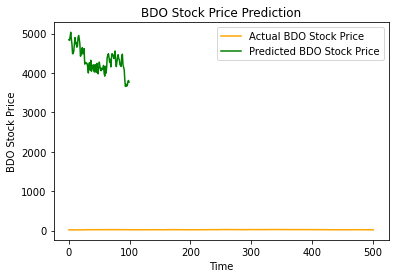

In [63]:
#Plotting the curve for true values and overlap it with that for the predicted value

plt.plot(actual_stock_price, color = 'orange', label = 'Actual BDO Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted BDO Stock Price')
plt.title('BDO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BDO Stock Price')
plt.legend()